In [1]:
import os
import re
import json
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

from melody import Melody
from utils import notes_to_midi, notes_and_chord_to_midi

rcParams['figure.figsize'] = 20,10

In [45]:
import importlib
import objective_metrics


importlib.reload(objective_metrics)

<module 'objective_metrics' from '/media/manu/Data/PycharmProjects/thesis/src/objective_metrics.py'>

In [46]:
folder = '../data/split_melody_data'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.csv'))]

In [47]:
irb_chord_progressions_filepath = '../data/chord_progressions/irb_chord_progressions.json'
wdb_chord_progressions_filepath = '../data/chord_progressions/weimar_db.json'
manual_chord_progressions_filepath = '../data/chord_progressions/manual_chord_progressions.json'

chord_progressions = {}
chord_progressions.update(json.load(open(irb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(wdb_chord_progressions_filepath)))
chord_progressions.update(json.load(open(manual_chord_progressions_filepath)))

In [48]:
metrics = {}

# filepath = '../data/split_melody/Real Book/All Of Me_original.csv'

all_dfs = []

for filepath in filepaths:
    song_name = os.path.basename(filepath).replace('.csv', '')
    song_name = "".join(song_name.split(' - ')[-1])
    song_name = re.sub('\(.*\)', '', song_name).strip()
    song_name = re.sub('_[0-9]', '', song_name)
    song_name = re.sub('_original', '', song_name)
    
    print(filepath) 

    original = 'Real Book' in filepath

    df = pd.read_csv(filepath, index_col=0)
    
    df['filename'] = filepath
    df['song'] = song_name
    df['original'] = original
    
    all_dfs.append(df)

#     pe1 = compute_piece_pitch_entropy(df, 1)
#     pe4 = compute_piece_pitch_entropy(df, 4)
#     gs = compute_piece_groove_similarity(df, max_pairs=np.inf)
#     qo = objective_metrics.calculate_QO(df)
#     qd = objective_metrics.calculate_QD(df)
#     cpr2 = objective_metrics.calculate_CPR(df, 2)
#     dpr12 = objective_metrics.calculate_DPR(df, 12)
#     ts8 = objective_metrics.calculate_TS(df, 8)
#     pv4 = objective_metrics.calculate_PV(df, 4)
#     rv4 = objective_metrics.calculate_RV(df, 4)
    hc = objective_metrics.calculate_HC(df)
        
    metrics[filepath] = {
#         'H1': pe1,
#         'H4': pe4,
#         'GS': gs,
#         'QO': qo,
#         'QD': qd,
#         'CPR2': cpr2,
#         'DPR12': dpr12,
#         'TS8': ts8,
#         'PV4': pv4,
#         'RV4': rv4,
        'HC': hc,
        'original': original
    }
    

total_df = pd.concat(all_dfs)  

../data/split_melody_data/Doug McKenzie/Alone Together_1.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_1.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_2.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_3.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_4.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_5.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_6.csv
../data/split_melody_data/Doug McKenzie/Autumn Leaves_7.csv
../data/split_melody_data/Doug McKenzie/But Beautiful_1.csv
../data/split_melody_data/Doug McKenzie/But Beautiful_2.csv
../data/split_melody_data/Doug McKenzie/But Beautiful_3.csv
../data/split_melody_data/Doug McKenzie/Come Rain Or Come Shine (1)_1.csv
../data/split_melody_data/Doug McKenzie/Come Rain Or Come Shine (1)_2.csv
../data/split_melody_data/Doug McKenzie/Come Rain Or Come Shine (2)_1.csv
../data/split_melody_data/Doug McKenzie/Come Sunday_1.csv
../data/split_melody_data/Doug McKenzie/Dancing On The Ceil

../data/split_melody_data/Jazz-Midi/Secret Love_3.csv
../data/split_melody_data/Jazz-Midi/Secret Love_5.csv
../data/split_melody_data/Jazz-Midi/September Song_1.csv
../data/split_melody_data/Jazz-Midi/Strangers In The Night_1.csv
../data/split_melody_data/Jazz-Midi/Sweet Georgia Brown_1.csv
../data/split_melody_data/Jazz-Midi/The Party's Over_1.csv
../data/split_melody_data/Jazz-Midi/The Shadow Of Your Smile_1.csv
../data/split_melody_data/Jazz-Midi/The Shadow Of Your Smile_2.csv
../data/split_melody_data/Jazz-Midi/The Shadow Of Your Smile_3.csv
../data/split_melody_data/Jazz-Midi/They Can't Take That Away From Me (2)_1.csv
../data/split_melody_data/Jazz-Midi/They Can't Take That Away From Me (2)_2.csv
../data/split_melody_data/Jazz-Midi/Watermelon Man_1.csv
../data/split_melody_data/Jazz-Midi/Watermelon Man_3.csv
../data/split_melody_data/Jazz-Midi/Watermelon Man_5.csv
../data/split_melody_data/Jazz-Midi/Watermelon Man_6.csv
../data/split_melody_data/Jazz-Midi/Yesterdays_1.csv
../data

../data/split_melody_data/MidKar/Deep Purple_2.csv
../data/split_melody_data/MidKar/Deep Purple_3.csv
../data/split_melody_data/MidKar/Here's That Rainy Day_1.csv
../data/split_melody_data/MidKar/Here's That Rainy Day_2.csv
../data/split_melody_data/MidKar/How High The Moon_1.csv
../data/split_melody_data/MidKar/I Cover The Waterfront_1.csv
../data/split_melody_data/MidKar/I Cover The Waterfront_2.csv
../data/split_melody_data/MidKar/I Cover The Waterfront_4.csv
../data/split_melody_data/MidKar/I Thought About You_1.csv
../data/split_melody_data/MidKar/I'll Be Around_1.csv
../data/split_melody_data/MidKar/I'm Confessin' That I Love You_1.csv
../data/split_melody_data/MidKar/Memories Of You_1.csv
../data/split_melody_data/MidKar/New York, New York_1.csv
../data/split_melody_data/MidKar/Old Devil Moon_1.csv
../data/split_melody_data/MidKar/Once In A While_1.csv
../data/split_melody_data/MidKar/Once In A While_2.csv
../data/split_melody_data/MidKar/Speak Low_1.csv
../data/split_melody_dat

../data/split_melody_data/Real Book/I Love You_original.csv
../data/split_melody_data/Real Book/I Should Care_original.csv
../data/split_melody_data/Real Book/I Thought About You_original.csv
../data/split_melody_data/Real Book/I Want To Be Happy_original.csv
../data/split_melody_data/Real Book/I Won't Dance_original.csv
../data/split_melody_data/Real Book/I'll Be Around_original.csv
../data/split_melody_data/Real Book/I'll Remember April_original.csv
../data/split_melody_data/Real Book/I'm Confessin' That I Love You_original.csv
../data/split_melody_data/Real Book/I'm In The Mood For Love_original.csv
../data/split_melody_data/Real Book/I've Grown Accustomed To Her Face_original.csv
../data/split_melody_data/Real Book/Imagination_original.csv
../data/split_melody_data/Real Book/Impressions_original.csv
../data/split_melody_data/Real Book/In A Mellow Tone_original.csv
../data/split_melody_data/Real Book/In A Sentimental Mood_original.csv
../data/split_melody_data/Real Book/In Your Own 

../data/split_melody_data/Weimar DB/Phil Woods - On A Slow Boat To China_1.csv
../data/split_melody_data/Weimar DB/Phil Woods - On A Slow Boat To China_2.csv
../data/split_melody_data/Weimar DB/Phil Woods - On A Slow Boat To China_3.csv
../data/split_melody_data/Weimar DB/Sidney Bechet - Summertime_1.csv
../data/split_melody_data/Weimar DB/Benny Carter - Long Ago And Far Away (2)_1.csv
../data/split_melody_data/Weimar DB/Chet Baker - Just Friends_1.csv
../data/split_melody_data/Weimar DB/Dizzy Gillespie - Groovin' High_1.csv
../data/split_melody_data/Weimar DB/John Coltrane - Giant Steps (1)_1.csv
../data/split_melody_data/Weimar DB/John Coltrane - Impressions (2)_12.csv
../data/split_melody_data/Weimar DB/Miles Davis - Eighty-One_3.csv
../data/split_melody_data/Weimar DB/Milt Jackson - Bemsha Swing_4.csv
../data/split_melody_data/Weimar DB/Sidney Bechet - Summertime_2.csv
../data/split_melody_data/Weimar DB/Don Ellis - I Love You_1.csv
../data/split_melody_data/Weimar DB/Don Ellis - I

In [49]:
m = pd.DataFrame().from_dict(metrics).T
m

,HC,original
../data/split_melody_data/Doug McKenzie/Alone Together_1.csv,0.738621,False
../data/split_melody_data/Doug McKenzie/Autumn Leaves_1.csv,0.795864,False
../data/split_melody_data/Doug McKenzie/Autumn Leaves_2.csv,0.741201,False
../data/split_melody_data/Doug McKenzie/Autumn Leaves_3.csv,0.751909,False
../data/split_melody_data/Doug McKenzie/Autumn Leaves_4.csv,0.777195,False
...,...,...
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_2.csv,0.559241,False
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_3.csv,0.508959,False
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_4.csv,0.686031,False
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_5.csv,0.648701,False


In [6]:
pitch_classes = ['C','Db','D','Eb','E','F','F#','G', 'Ab', 'A', 'Bb', 'B']


total_df['pitch_class'] = (total_df['pitch'] % 12).apply([lambda x: pitch_classes[x]])

In [ ]:
g = sns.histplot(
    data=total_df, 
    x='offset', hue='original',
    stat="density", common_norm=False
)
g.set_xticks(range(0,49))

In [ ]:
g = sns.histplot(
    data=total_df[total_df['duration'] <= 48], 
    x='duration', hue='original', stat="density", common_norm=False)
g.set_xticks(range(1,49))

In [ ]:
g = sns.countplot(total_df.groupby('filename')['measure'].apply(max) + 1)
# g.set_xticks(range(0,129,4))

In [ ]:
print(
    total_df[total_df['original'] == True]['pitch'].min(),
    total_df[total_df['original'] == True]['pitch'].max()
)

In [ ]:
print(
    total_df[total_df['original'] == False]['pitch'].min(),
    total_df[total_df['original'] == False]['pitch'].max()
)

In [ ]:
g = sns.histplot(data=total_df[(total_df['pitch']<109) & (total_df['pitch']>=36)], 
                 x='pitch', 
                 hue='original',
                 stat="density", common_norm=False
                )
g.set_xticks(range(36,109))
g.set_xticklabels(pitch_classes * 6 + ['C'])

In [ ]:
g = sns.histplot(data=total_df, 
                  x='pitch_class', hue='original', 
                  stat="density", common_norm=False
 )

In [ ]:
total_df = total_df.merge(pd.DataFrame(total_df.groupby('filename').size()), how='left', left_on='filename', right_on='filename')
total_df = total_df.rename(columns={0: 'n_notes'})
print(
    total_df['n_notes'].min(),
    total_df['n_notes'].max(),
)

In [ ]:
sns.histplot(data=total_df, x='n_notes', hue='original')

In [ ]:
sns.countplot(total_df[total_df['original'] == False].groupby('song')['filename'].unique().apply(len))

In [ ]:
total_df['duration'].value_counts()

In [ ]:
import ast
import music21

context  = music21.key.Key('C')

total_df['chord_notes_triads'] = total_df['chord_notes'].apply([lambda x: str(ast.literal_eval(x)[1:4])])

In [ ]:
sns.countplot(data=total_df, x='chord_root', order=total_df['chord_root'].value_counts().index)

In [ ]:
chord_map = {}

for uc in total_df['chord_notes_triads'].unique():
    c = ast.literal_eval(uc)
    chord_map[uc] = music21.chord.Chord(c).simplifyEnharmonics(keyContext=context).pitchedCommonName
    

In [ ]:
total_df['chord_notes_triad_names'] = total_df['chord_notes_triads'].apply([lambda x: chord_map[x]])
total_df['chord_notes_triad_names'] = total_df['chord_notes_triad_names'].str.replace('triad', '').str.replace('-', ' ')

In [ ]:
sns.countplot(data=total_df, x='chord_notes_triad_names', order=total_df['chord_notes_triad_names'].value_counts().iloc[:20].index)

In [ ]:
folder = '../data/Complete Examples Melodies/Real Book'
filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [10]:
stats = {}

for filepath in filepaths:
    melody = Melody(filepath)
    melody.setup()
    
    stats[melody.filepath] = {
        'key': melody.key
    }
    

In [11]:
s = pd.DataFrame().from_dict(stats).T
s

,key
../data/split_melody_data/Doug McKenzie/Alone Together_1.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_1.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_2.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_3.csv,None
../data/split_melody_data/Doug McKenzie/Autumn Leaves_4.csv,None
...,...
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_2.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_3.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_4.csv,None
../data/split_melody_data/Weimar DB/David Liebman - Softly As In A Morning Sunrise_5.csv,None


In [ ]:
s['key_root'] = s['key'].apply(lambda x: x.tonic)
s['key_mode'] = s['key'].apply(lambda x: x.mode)
s['key_name'] = s['key'].apply(lambda x: x.name.replace('-', 'b'))

In [ ]:
sns.countplot(s['key_name'], order=s['key_name'].value_counts().index)

In [ ]:
sns.histplot(data=m, x='H1', hue='original', element="step")

In [ ]:
m[m['H4'] == 0]

In [ ]:
sns.histplot(data=m, x='H4', hue='original', element="step")

In [ ]:
sns.histplot(data=m, x='GS', hue='original', element="step")

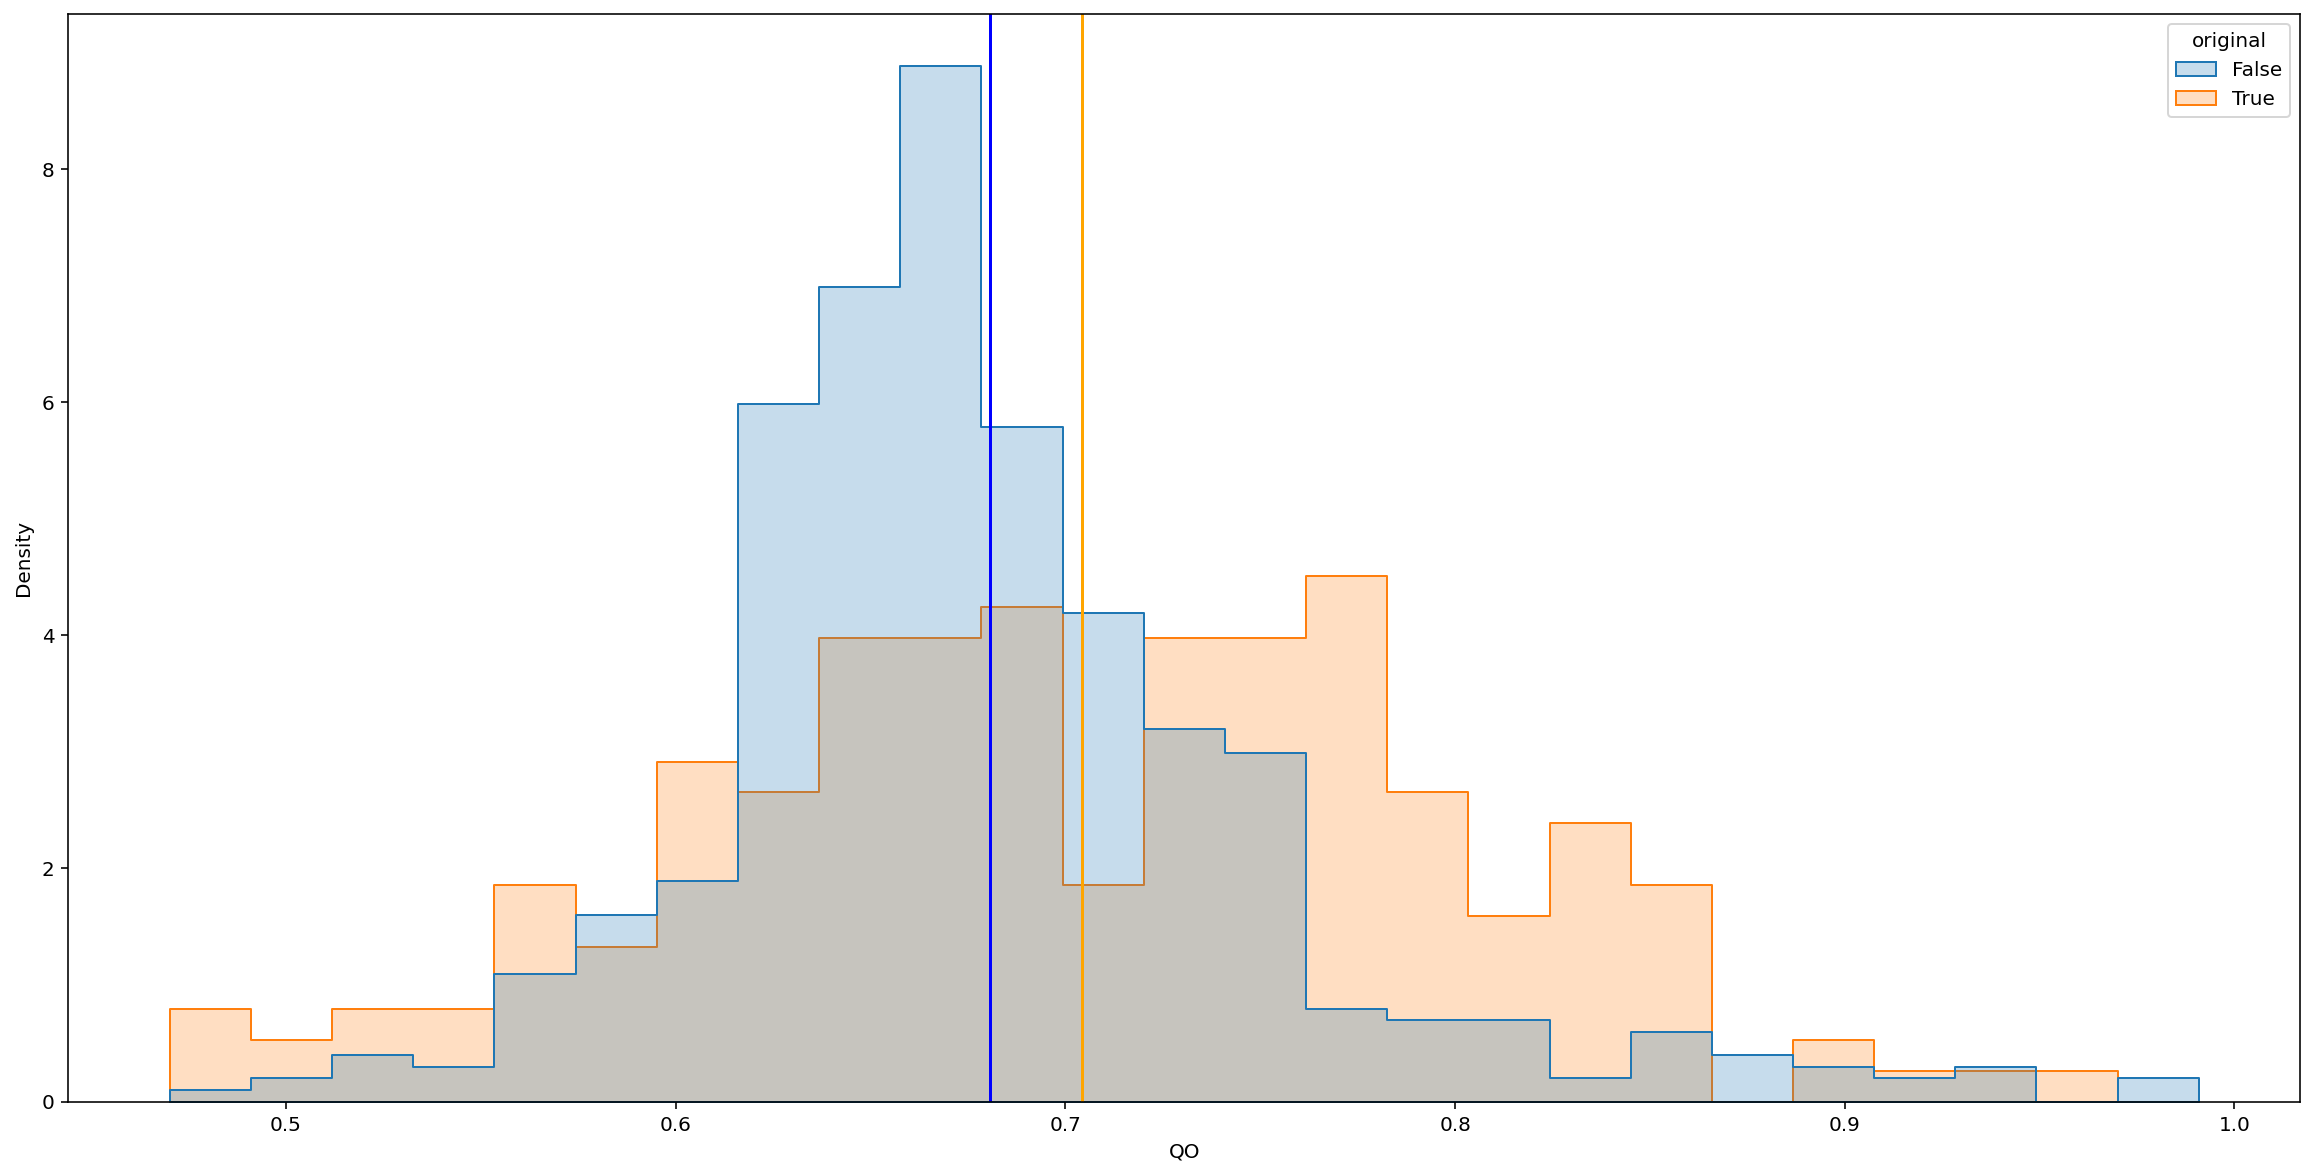

In [85]:
sns.histplot(data=m, x='QO', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QO.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QO.mean(),
            color='blue')

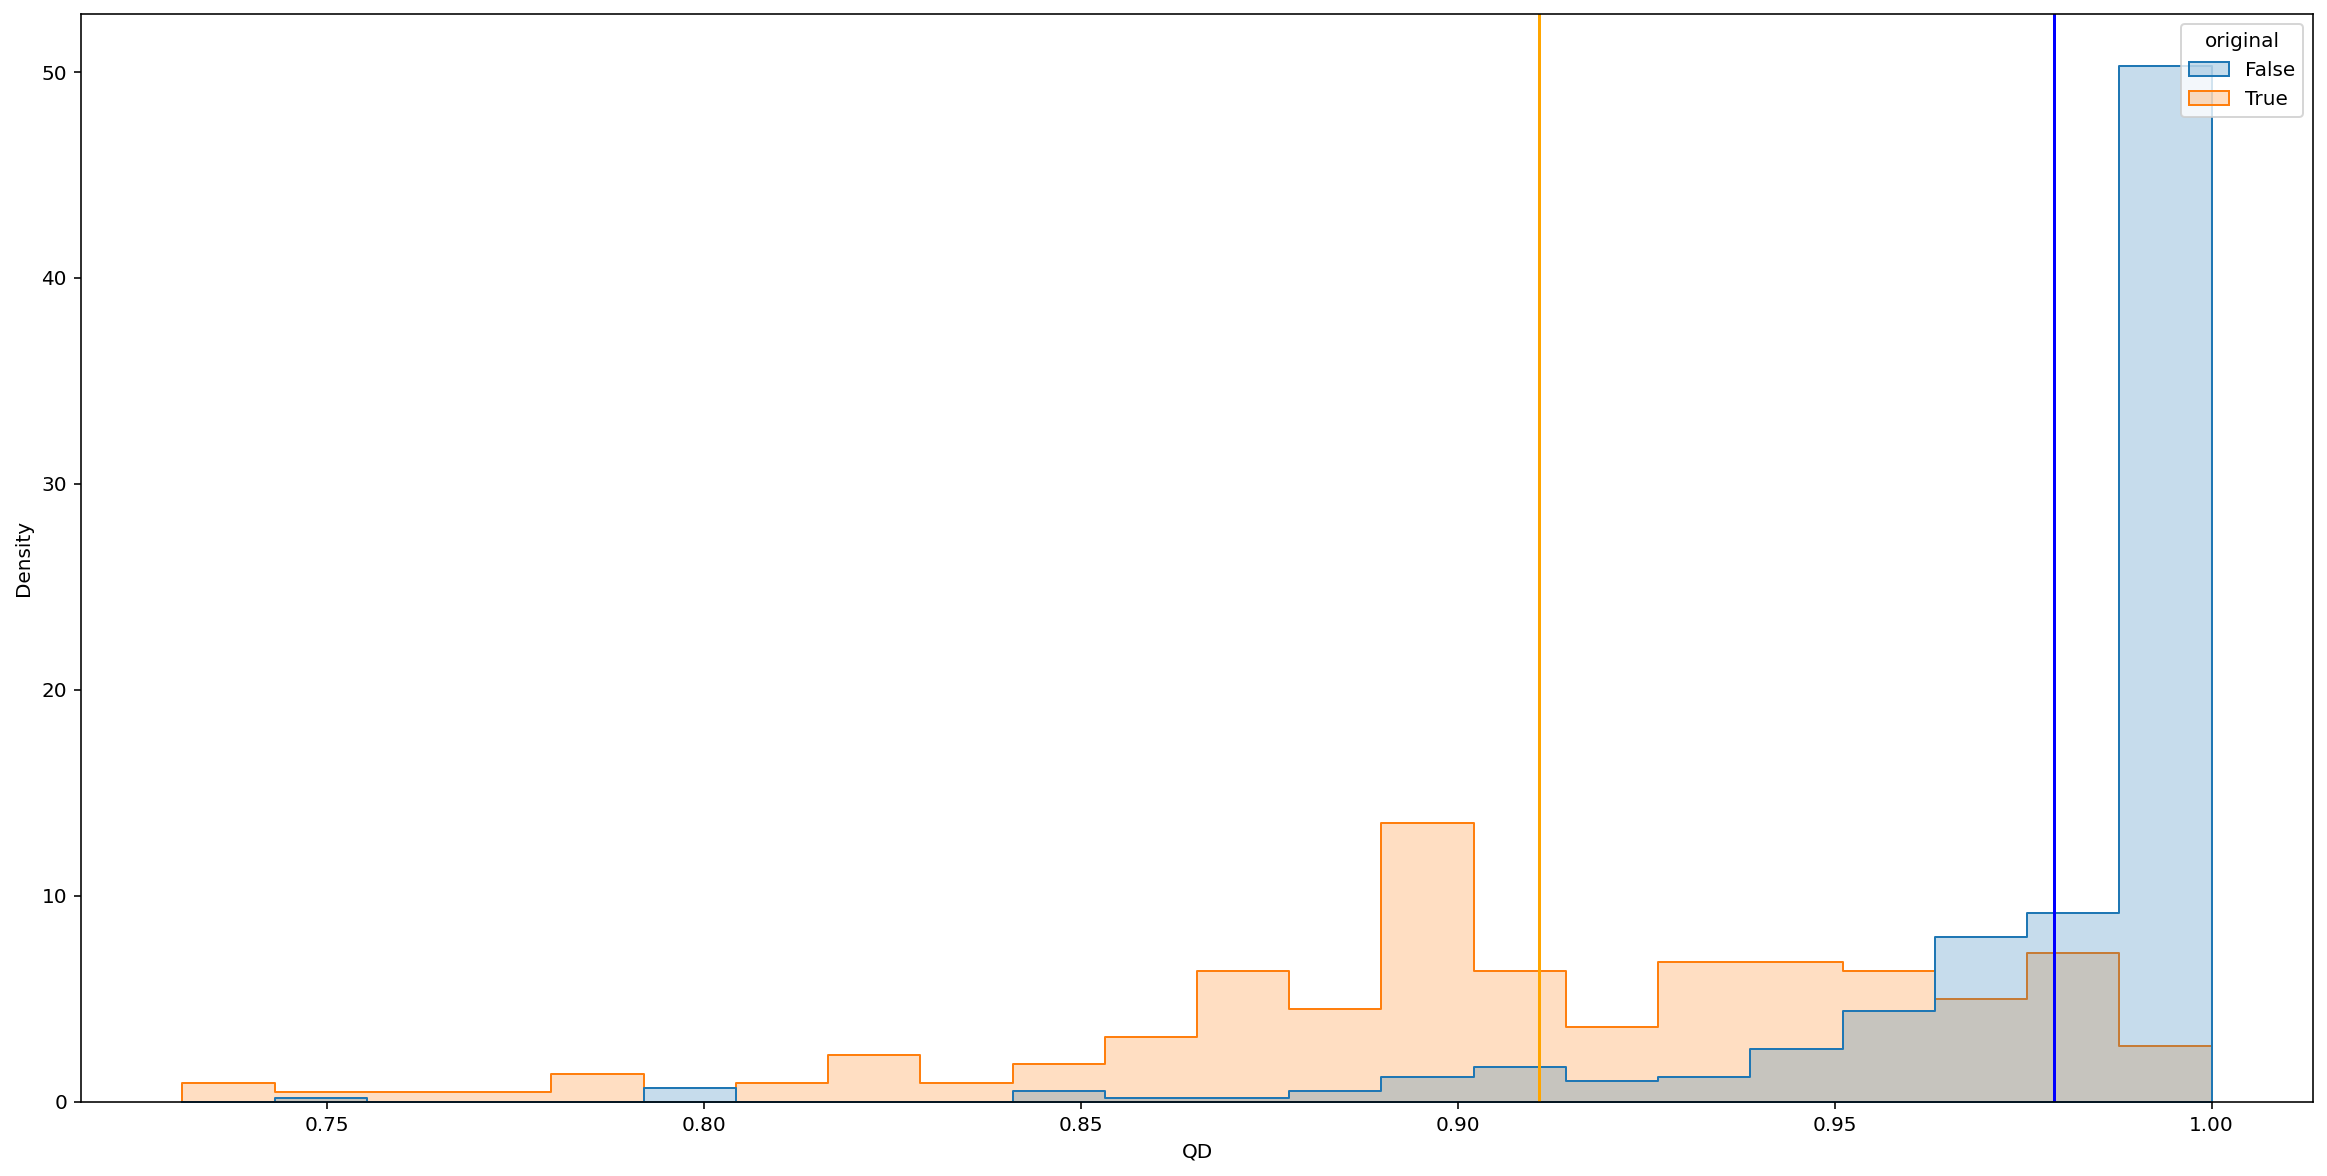

In [74]:
sns.histplot(data=m, x='QD', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].QD.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].QD.mean(),
            color='blue')

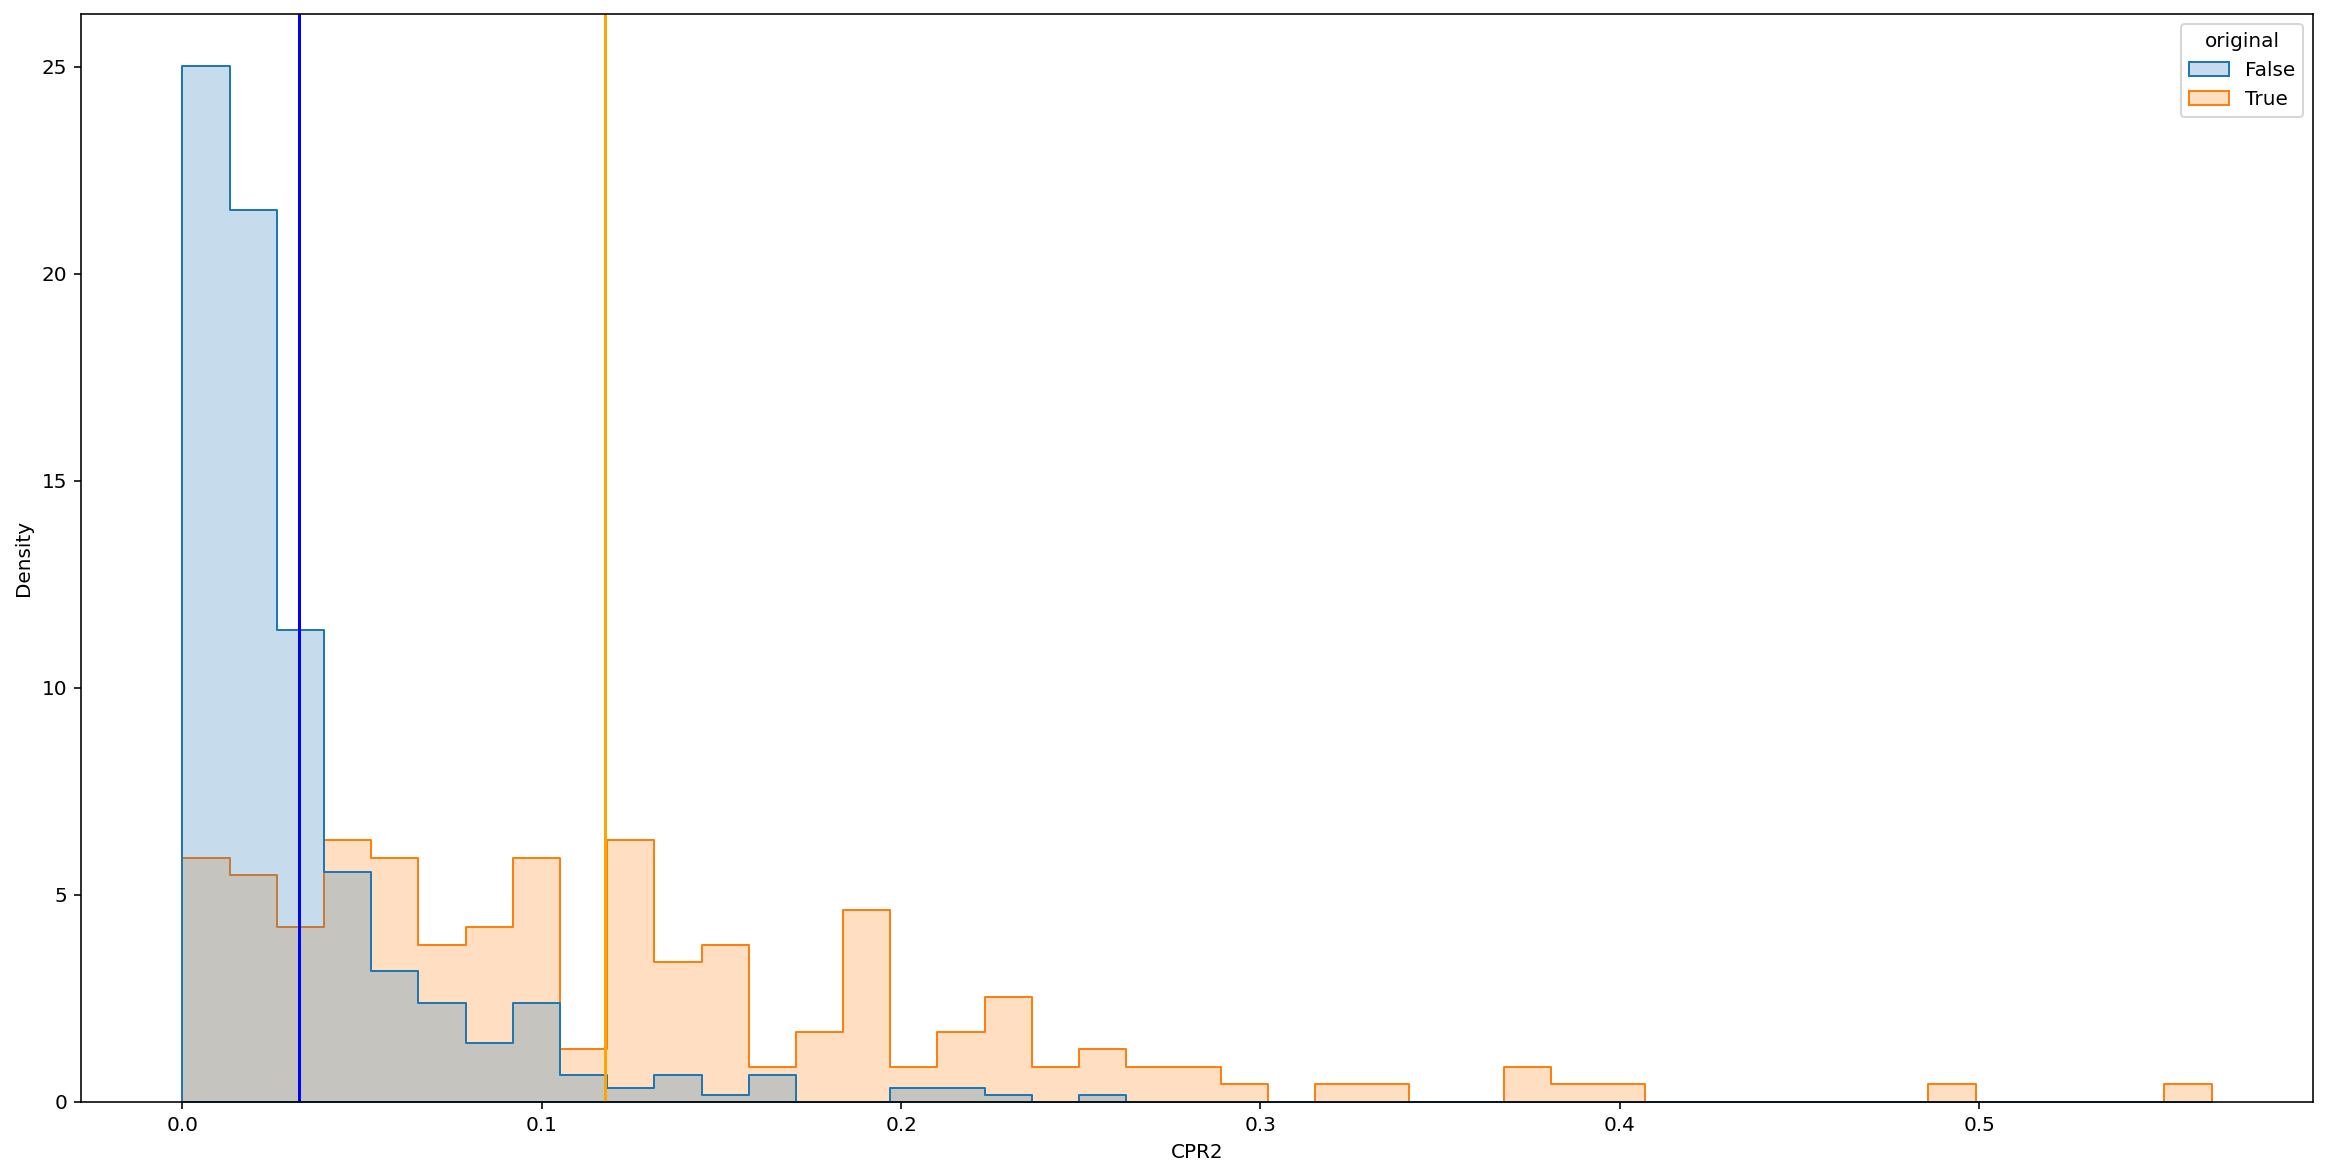

In [76]:
sns.histplot(data=m, x='CPR2', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].CPR2.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].CPR2.mean(),
            color='blue')

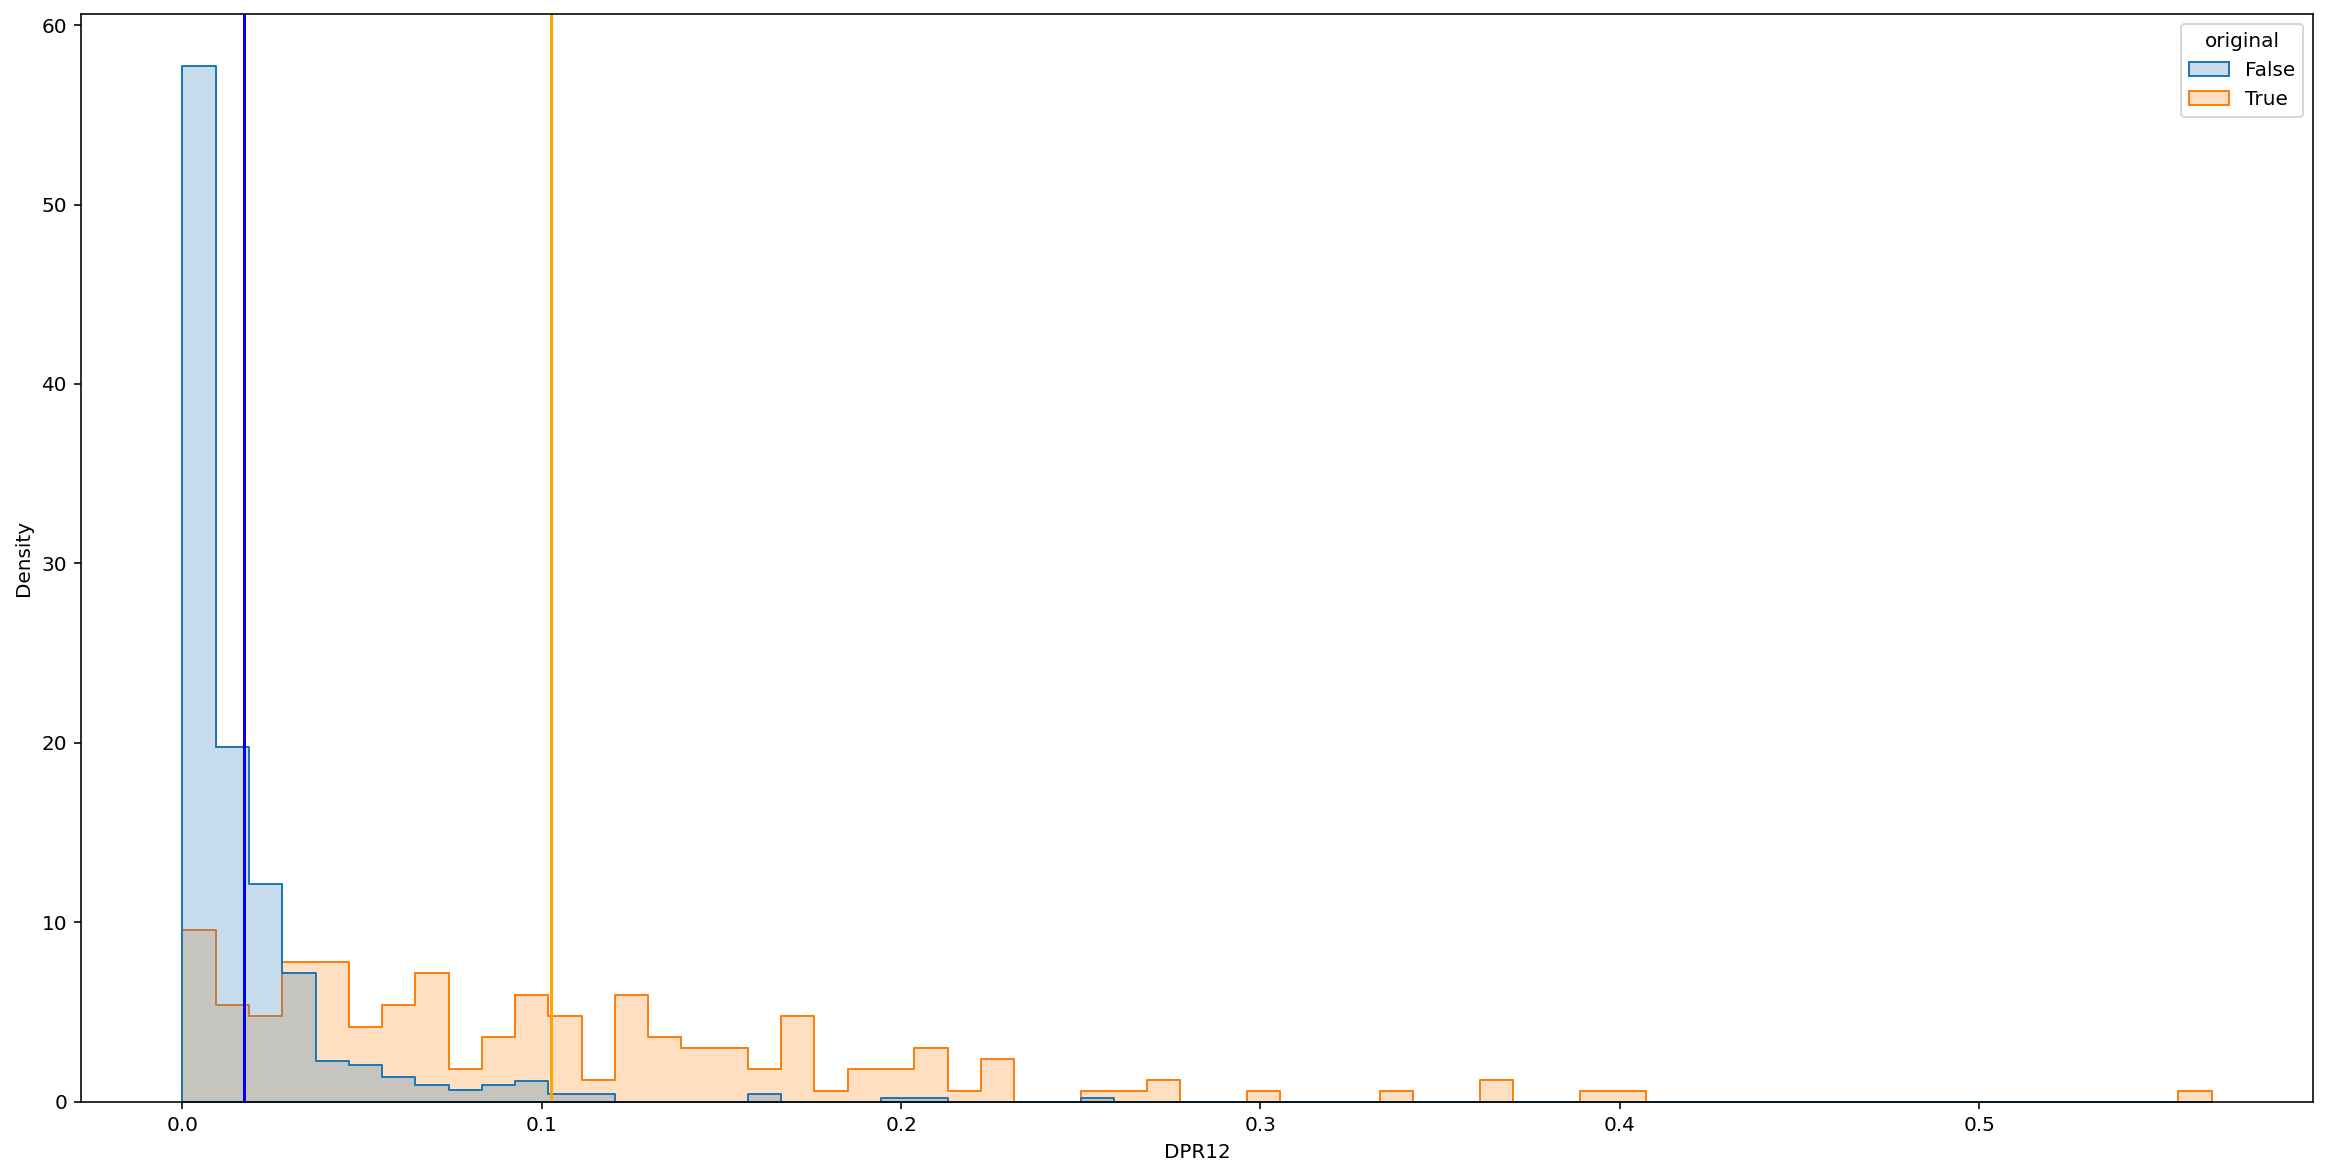

In [79]:
sns.histplot(data=m, x='DPR12', hue='original', element="step", 
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].DPR12.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].DPR12.mean(),
            color='blue')

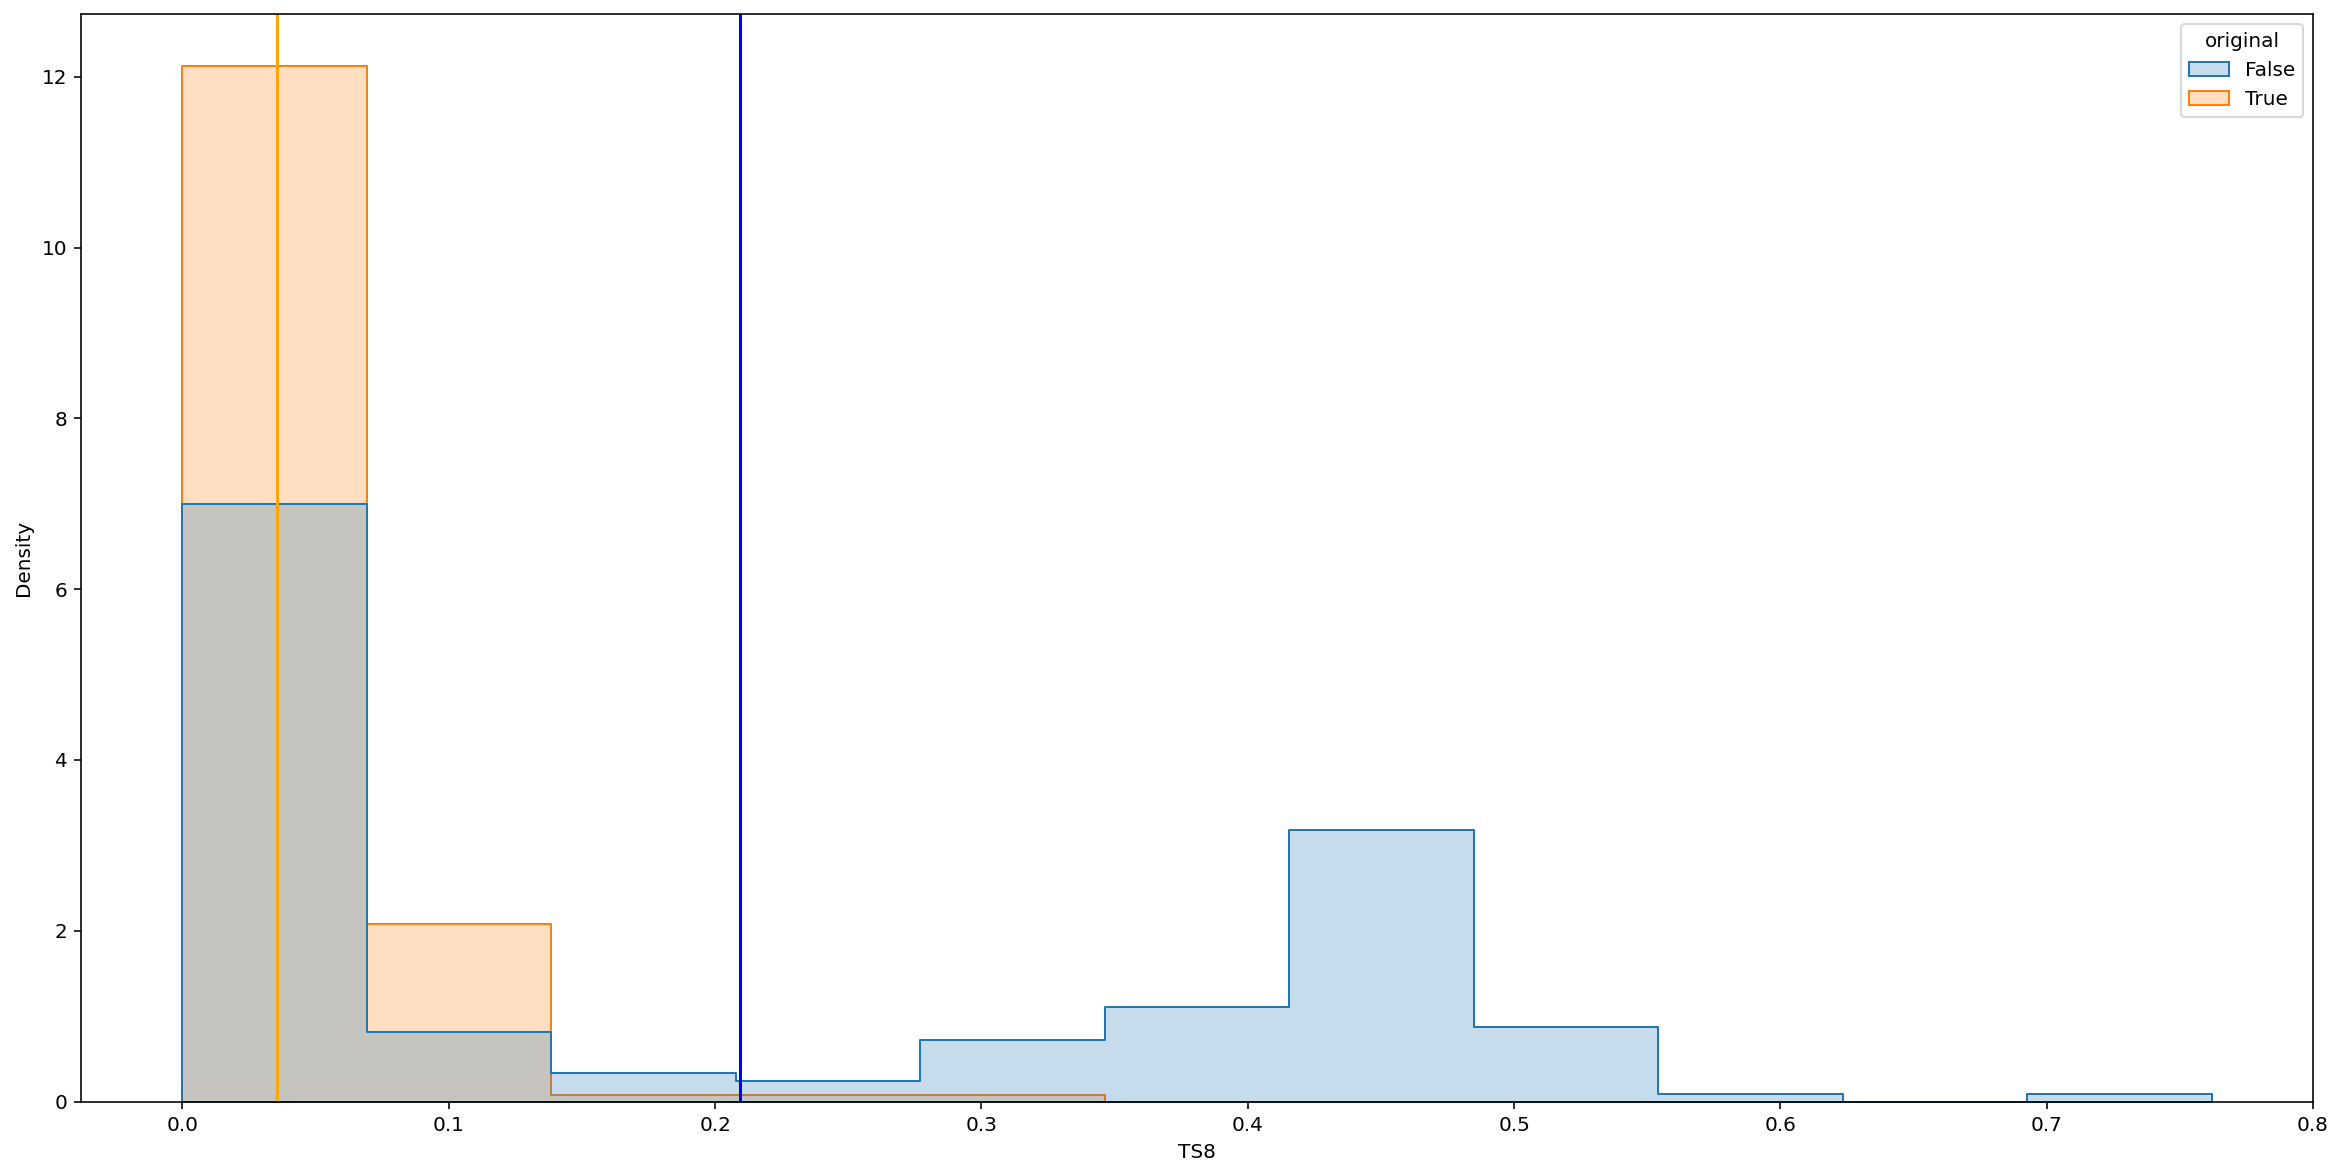

In [8]:
sns.histplot(data=m, x='TS8', hue='original', element="step",
             stat="density", common_norm=False)
plt.axvline(x=m[m.original == True].TS8.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].TS8.mean(),
            color='blue')

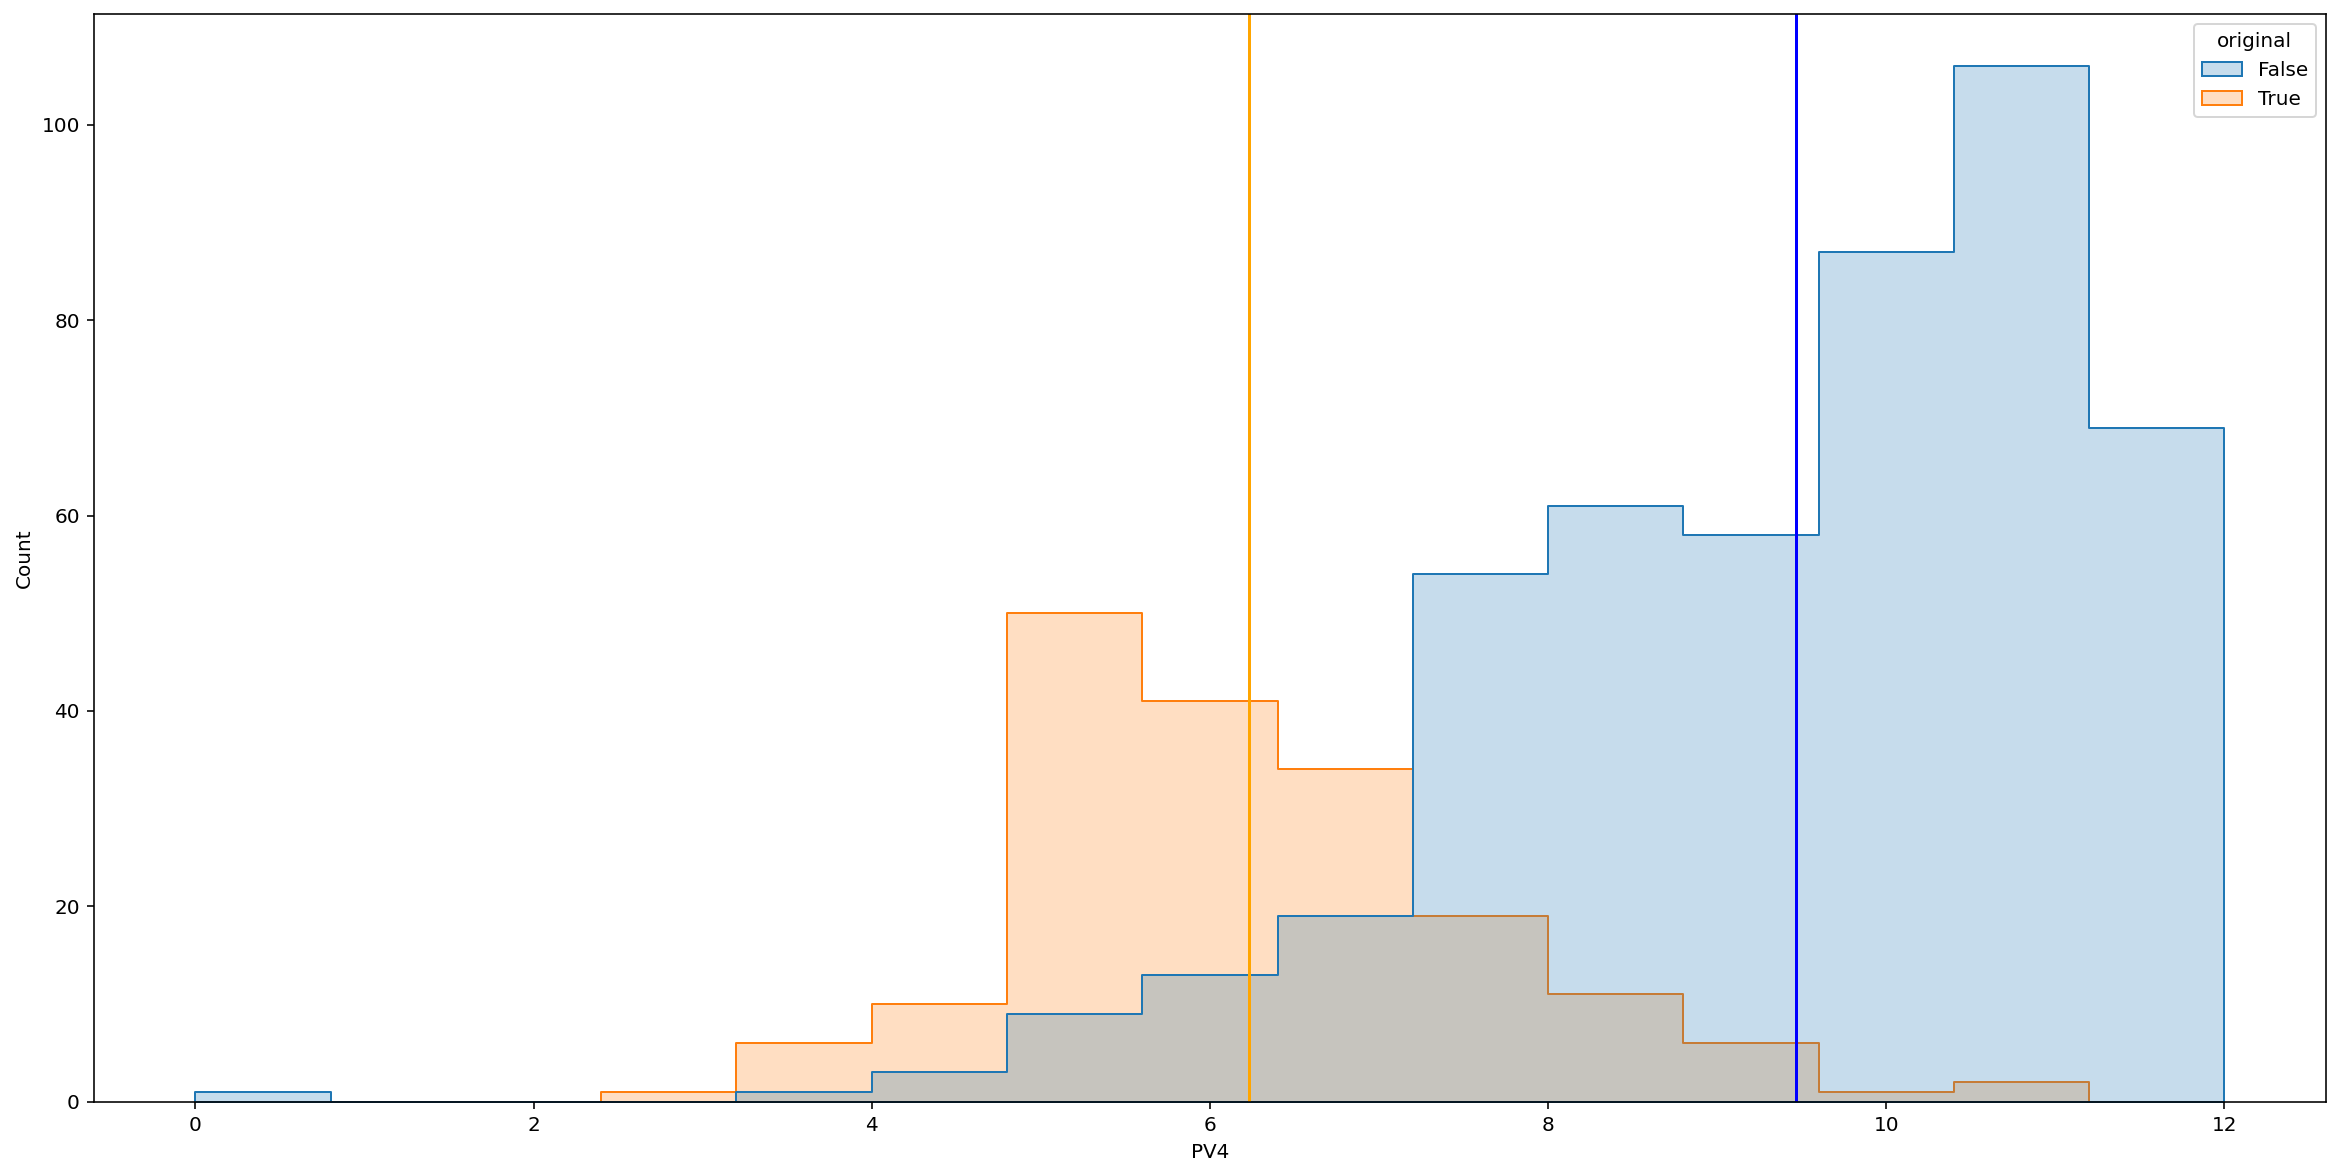

In [7]:
sns.histplot(data=m, x='PV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].PV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].PV4.mean(),
            color='blue')

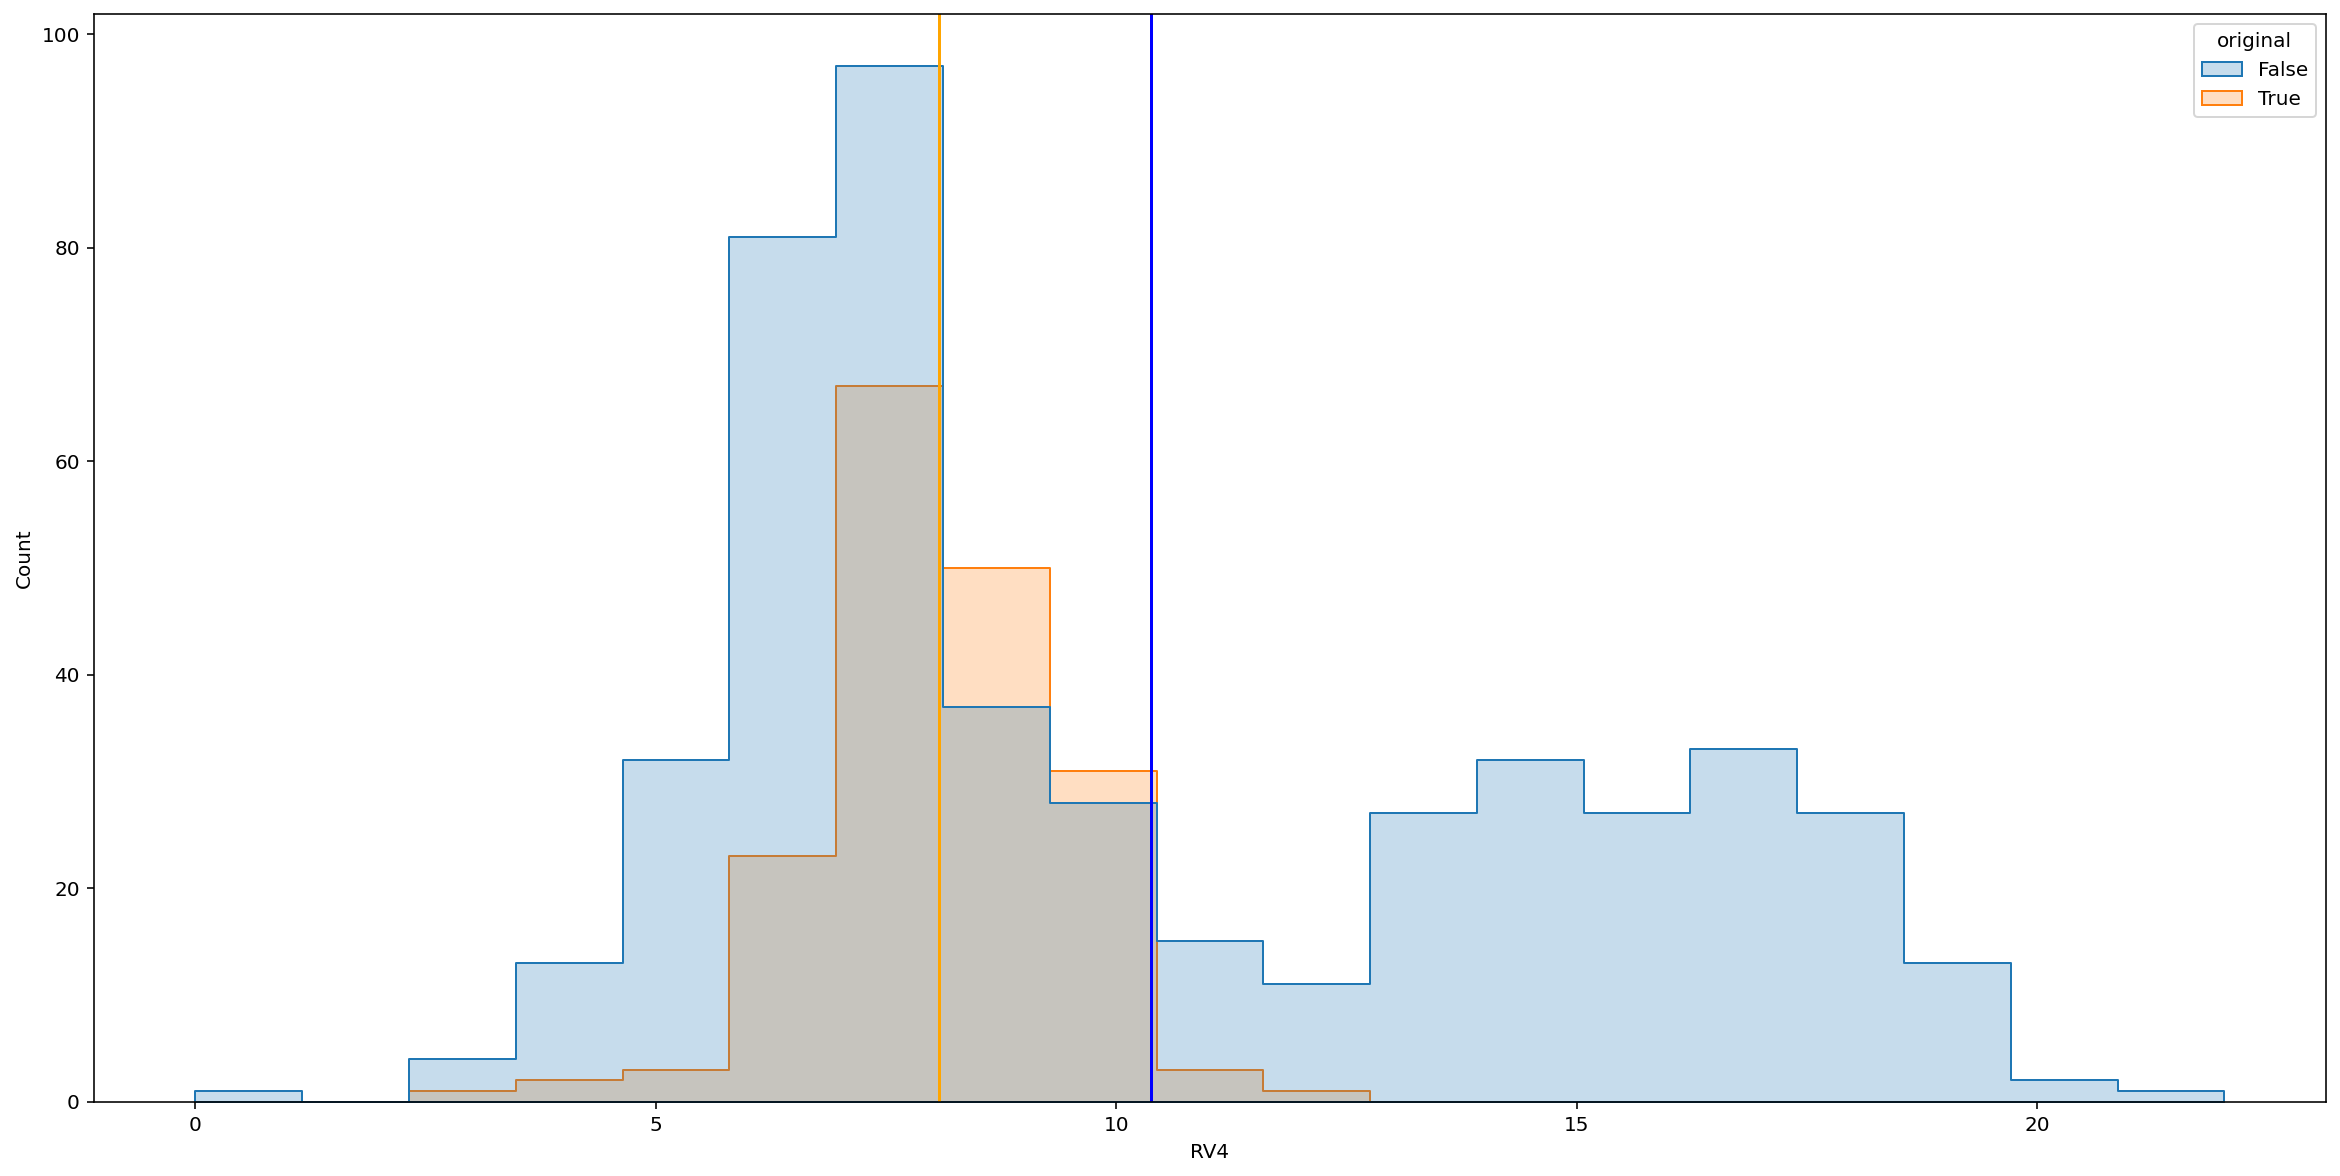

In [8]:
sns.histplot(data=m, x='RV4', hue='original', element="step")
plt.axvline(x=m[m.original == True].RV4.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].RV4.mean(),
            color='blue')

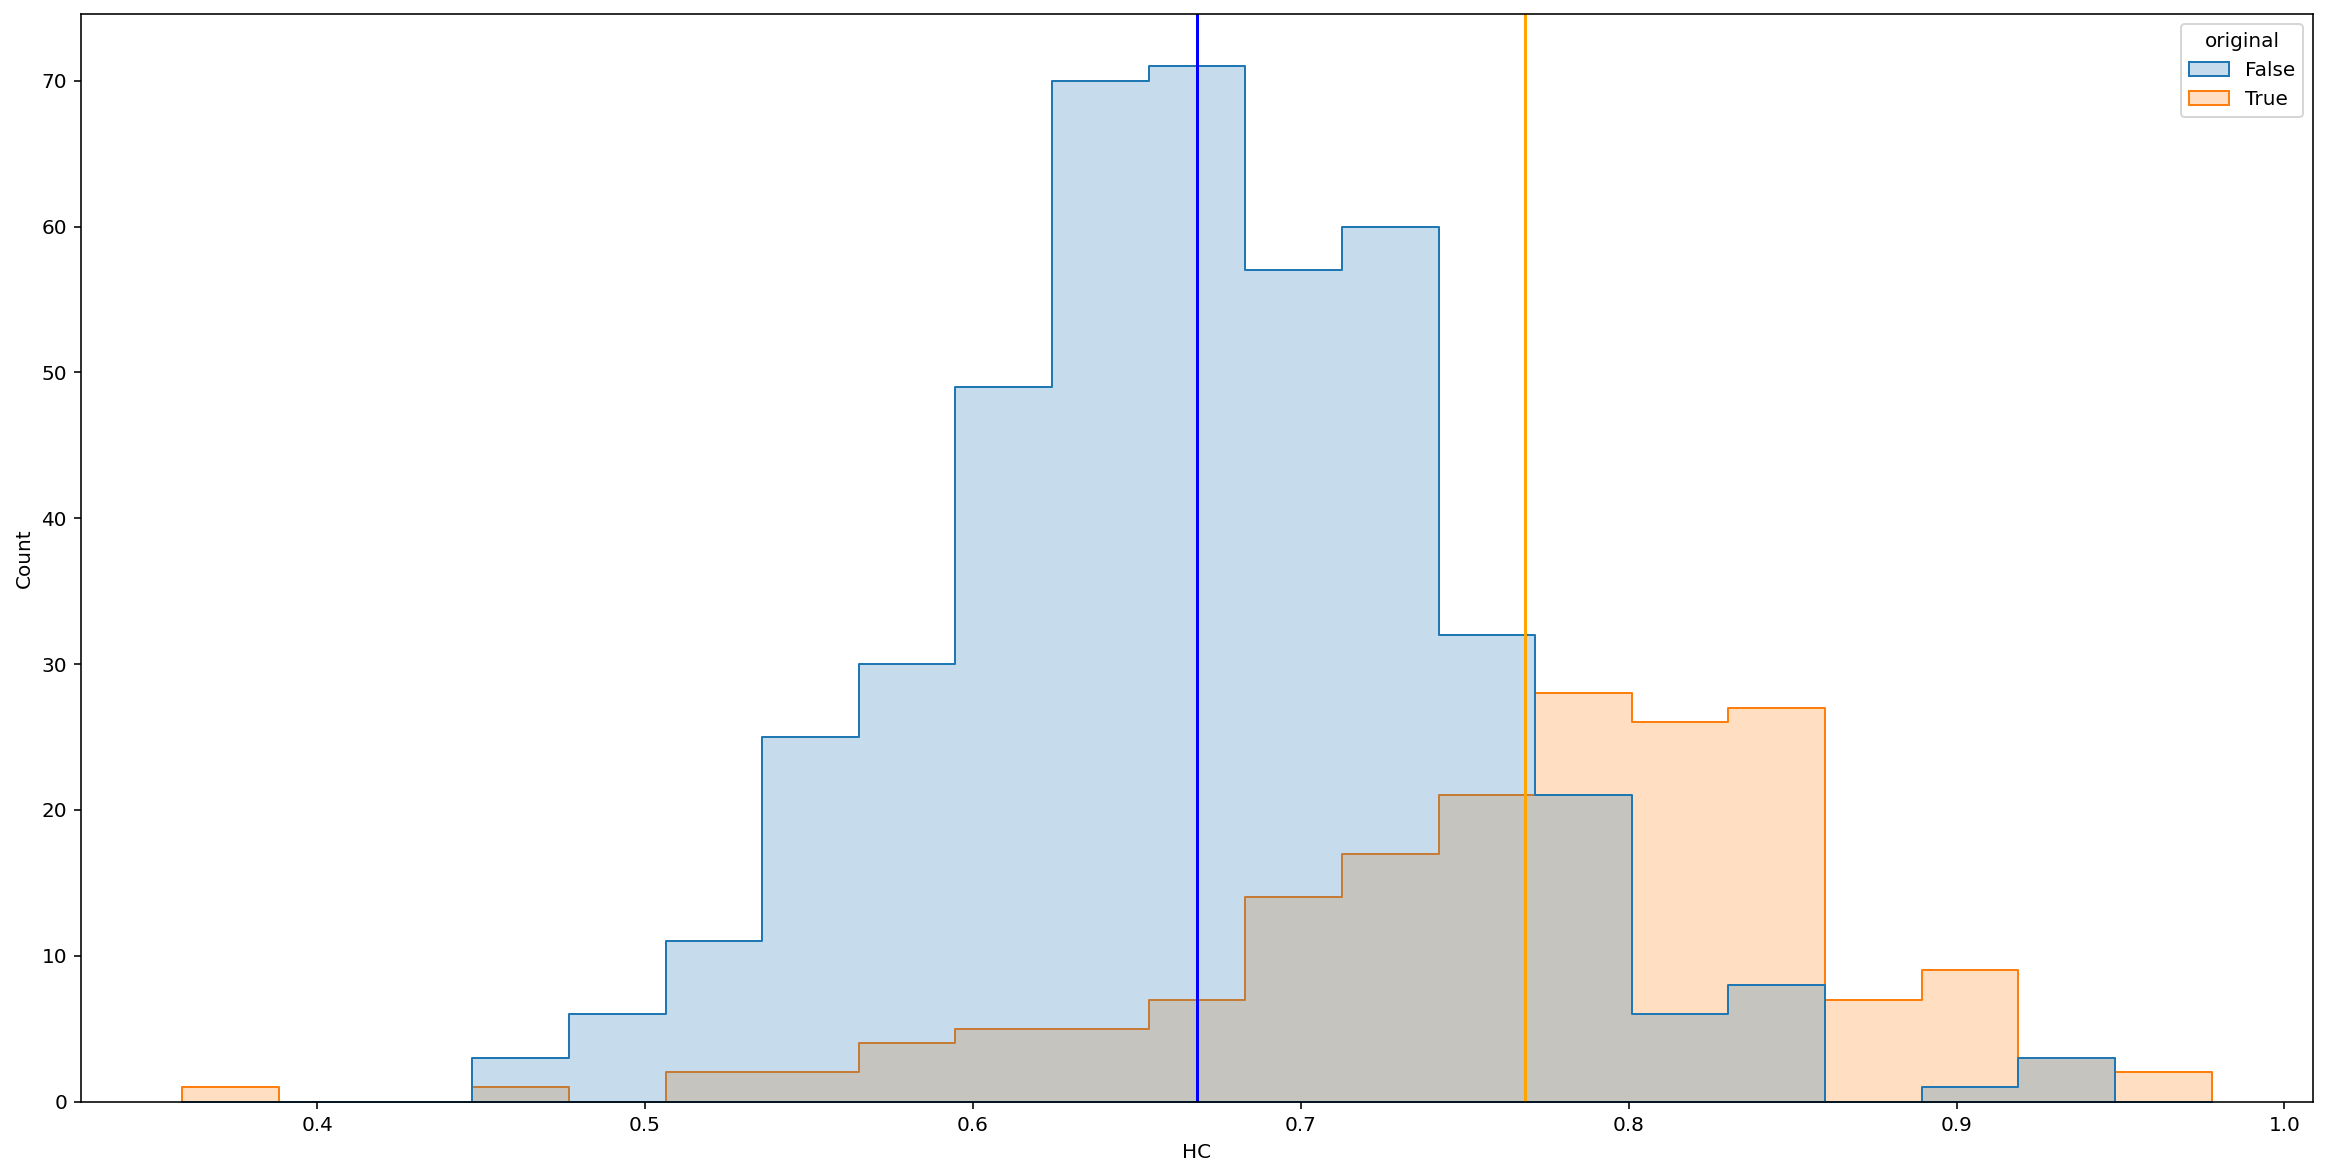

In [52]:
sns.histplot(data=m, x='HC', hue='original', element="step")
plt.axvline(x=m[m.original == True].HC.mean(),
            color='orange')
plt.axvline(x=m[m.original == False].HC.mean(),
            color='blue')

In [50]:
m.HC.value_counts()

0.743563    3
0.610357    2
0.692467    2
0.688078    2
0.652890    2
           ..
0.627639    1
0.617104    1
0.620094    1
0.693594    1
0.685875    1
Name: HC, Length: 613, dtype: int64